# Visão Computacional com Python

Instalação da OpenCV:

### Lendo uma imagem:

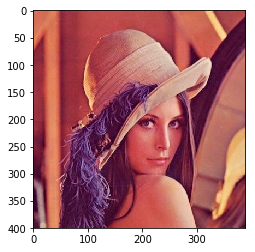

In [27]:
import cv2
import matplotlib.pyplot as plt 

img = cv2.imread('lena.jpg') #img é uma matriz de 3 dimensões

# o RGB em python eh dado por BGR, então é preciso plotar a imagem invertida
plt.imshow(img[:,:,::-1])

### Exibindo imagem numa janela:

In [1]:
import cv2

img = cv2.imread('lena.jpg') # img é uma matriz de 3 dimensões

cv2.imshow('titulo da janela',img) # para exibir a imagem em uma janela

cv2.destroyAllWindows()

### Cada dimensão na matriz representa um canal de cor.
Cada célula da matriz contém três valores, referentes à quantidade de cada canal cor(Red, green, blue)

### Para ver as dimensões da imagem:

In [3]:
import cv2

img = cv2.imread('lena.jpg') # img é uma matriz de 3 dimensões

M, N, c = img.shape # o shape retorna paramêtros da forma
print('Quantidade de linhas: ', M)
print('Quantidade de colunas: ', N)
print('Quantidade de canais de cores: ', c)

Quantidade de linhas:  400
Quantidade de colunas:  390
Quantidade de canais de cores:  3


## Pixel

### Cada célula na matriz da imagem corresponde a um pixel
Cada pixel pode assumir valores de 0 a 255(8 bits). O valor 0 corresponde à cor preta e o valor 255 à cor branca.

Obtendo os valores de um pixel:

In [6]:
import cv2
import matplotlib.pyplot as plt 

img = cv2.imread('lena.jpg') # img é uma matriz

azul = img[10,20,0]  # o pixel desejado
verde = img[10,20,1]
vermelho = img[10,20,2]

plt.imshow(img[:,:,::-1])

print("O pixel [10,20] tem os valores: \n R = {} G = {} B = {}".format(verde, azul, vermelho))

O pixel [10,20] tem os valores: 
 R = 109 G = 83 B = 209


## Canais de cor

### Para ver cada canal de cor separadamente:

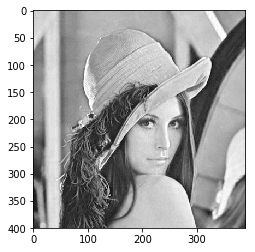

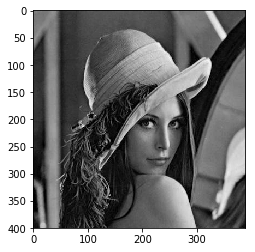

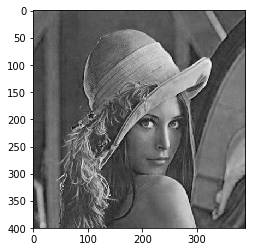

In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg') # img é uma matriz

B,G,R = cv2.split(img) # separando as matrizes R,G e B

plt.gray()
plt.imshow(R)
plt.show()
plt.imshow(G)
plt.show()
plt.imshow(B)


### Exibir a imagem sem algum tom:


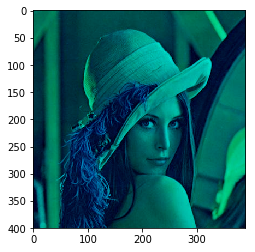

In [10]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg') # img é uma matriz

img[:,:,2] = 0 # zerando o tom vermelho
plt.imshow(img[:,:,::-1]) #exibir imagem sem o tom vermelho

## Escala de cinza

Existem diversas técnicas para realizar trandormar uma imagem colorida em escala de cinza. Este é um campo de pesquisa em aberto na área de processamento de imagens.
A técnica mais simples é realizar a média do canais R, G e B
$$ W = (R + G + B)/3$$

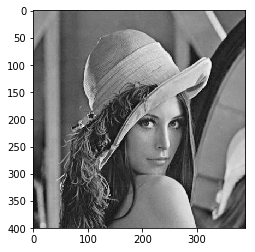

In [11]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg') # img é uma matriz

B,G,R = cv2.split(img)
#W = (B+G+R)/3.0
W = B/3 + G/3 + R/3
plt.imshow(W)

## Pré-processamento

### Aplicação de filtros

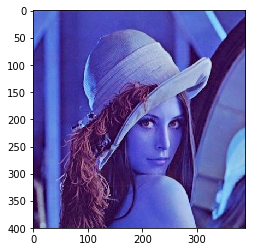

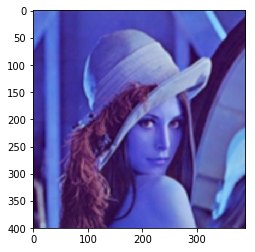

In [21]:
import cv2
import matplotlib.pyplot as plt

imgOriginal = cv2.imread("lena_ruido.jpg") 
imgTratada = cv2.blur(imgOriginal, (5,5)) 

plt.imshow(imgOriginal)
plt.show()
plt.imshow(imgTratada)

### Elementos estruturantes

In [23]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread("texto_exemplo.png", 0) 

elementoEstruturante = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (3,3) ) 

imagemProcessada = cv2.erode( imagemOriginal, elementoEstruturante, iterations = 1 ) 

plt.gray()
plt.imshow(imagemOriginal)
plt.show()
plt.imshow(imagemProcessada)

error: OpenCV(4.0.0) /io/opencv/modules/core/src/matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'locateROI'


## Segmentação


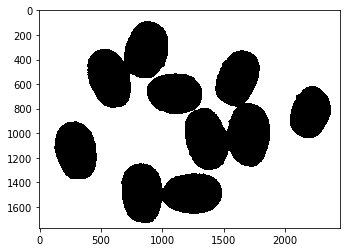

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('feijao.png')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

W = np.zeros((qtdeLinhas, qtdeColunas), dtype=int) #criando uma imagem toda preta (todos os pixels com valores = 0)


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(G[i,j] > R[i,j] and G[i,j] > B[i,j]):
            W[i,j] = 255
        

plt.gray()
plt.imshow(W)

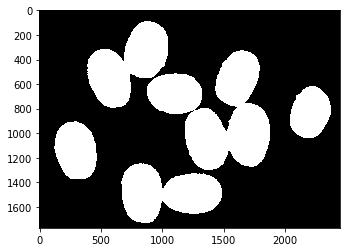

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('feijao.png')

qtdeLinhas, qtdeColunas, c = img.shape

B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

W = np.zeros((qtdeLinhas, qtdeColunas), dtype=int)+255 #criando uma imagem toda branca (todos os pixels com valores = 255)


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(G[i,j] > R[i,j] and G[i,j] > B[i,j]): #se um pixel tiver o canal verde  maior que os outros dois canais (Red e Blue)
            W[i,j] = 0 # o pixel vira fundo
        
plt.gray()
plt.imshow(W)

## Brincando com cores e formas

### Círculo

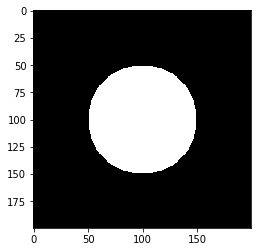

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def distancia(a1, b1, a2, b2):
    return np.sqrt((a1-a2)**2+(b1-b2)**2)

qtdeLinhas = 200
qtdeColunas = 200


W = np.zeros((qtdeLinhas,qtdeColunas))

centro = [100,100]
raio = 50

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(distancia(i,j,centro[0],centro[1]) < raio):
            W[i,j] = 255

    
plt.gray()
plt.imshow(W)

### Círculo colorido:

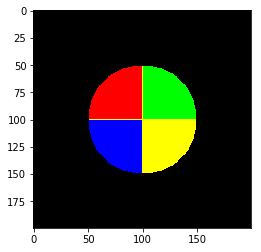

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def distancia(a1, b1, a2, b2):
    return np.sqrt((a1-a2)**2+(b1-b2)**2)

qtdeLinhas = 200
qtdeColunas = 200


W = np.zeros((qtdeLinhas,qtdeColunas, 3), dtype=int)

centro = [100,100]
raio = 50

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(distancia(i,j,centro[0],centro[1]) < raio):
            if( i < 100 and j < 100):
                W[i,j,0] = 255
            elif (i < 100 and j > 100):
                W[i,j,1] = 255
            elif (i > 100 and j < 100):
                W[i,j,2] = 255
            else:
                W[i,j,0] = 255
                W[i,j,1] = 255

    
plt.imshow(W)

Uma reta:

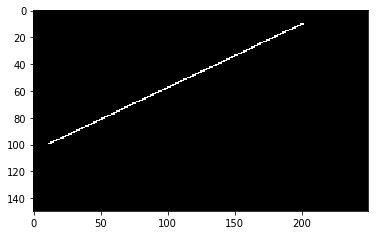

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


qtdeLinhas = 150
qtdeColunas = 250


W = np.zeros((qtdeLinhas,qtdeColunas), dtype=int)

x_inicial = 100
y_inicial = 10
x_final = 10
y_final = 200

coef = (y_final-y_inicial)/(x_final-x_inicial)

for i in range(x_final, x_inicial):
    j = round(y_inicial+coef*(i-x_inicial))
    W[i,j] = 255
    W[i,j+1] = 255
    W[i,j-1] = 255

    
plt.gray()
plt.imshow(W)

## Rotação


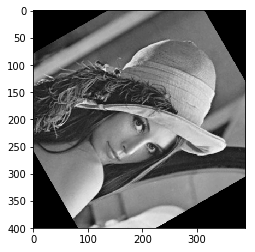

In [17]:
import cv2

img = cv2.imread('lena.jpg',0)
qtdeLinhas,qtdeColunas = img.shape

M = cv2.getRotationMatrix2D((qtdeLinhas/2,qtdeColunas/2),-60,1)

W = cv2.warpAffine(img, M, (qtdeColunas,qtdeLinhas))

plt.gray()
plt.imshow(W)